In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os 

In [8]:
df=pd.read_csv('/Users/behjiayi/Desktop/CTIP/Assignment Datasets/2malware/Malware dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [10]:
df.head(5)


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [11]:
df.isnull().sum()
#no null values

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [12]:
df.duplicated().sum()
#no duplicates

0

In [13]:
df.shape

(100000, 35)

In [14]:
#Dropping hash column as it doesnt help in prediction
df=df.drop(columns=['hash'])
df.head(5)

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [15]:
#using label encoder to convert the categorical column classification into numerical column
encoder=LabelEncoder()
df['classification']=encoder.fit_transform(df['classification'])
df.head(5)
#here 1 is malware and 0 is benign

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [16]:
#now to find out of any of the numeric columns will need scaling 
#Step1: seperte the categoricalmfrom the numeric columns
num_col=[]
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        num_col.append(col)
print(num_col)

['millisecond', 'classification', 'state', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw']


In [17]:
#Step2: Deciding which features need scaling
rows=[]
for col in num_col:
    minimum=df[col].min()
    maximum=df[col].max()
    rng=maximum - minimum
    mean=df[col].mean()
    std=df[col].std(ddof=0)
    if mean!=0:
        cv= std/mean #tells you how much the values are spread out from the average 
    else:
        if std !=0:
            cv = float("infinite") # the spread would be infinite if mean is 0 but variation still exists
        else:
            cv=0.0 

    uni=df[col].nunique()#cpunts the unique valus

    #check if binary
    if uni==2 and set(df[col].unique()).issubset({0,1}):
        is_binary=True
    else:
        is_binary=False

    #check if constant
    if uni==1:
        is_constant=True
    else:
        is_constant=False
    
    #appending the results for each column
    rows.append((col,rng,std,cv,is_binary,is_constant))

    


In [18]:
#Step3: Makinf a stat table for all the columns
stat= pd.DataFrame(rows,columns=["Feature_Name",'range','Standard_deviation','Control_Variance','Is_Binary','Is_constant'])
print(stat.head(10))

        Feature_Name     range  Standard_deviation  Control_Variance  \
0        millisecond       999          288.674990          0.577928   
1     classification         1            0.500000          1.000000   
2              state  43266048       936167.902458          5.933814   
3      usage_counter         0            0.000000          0.000000   
4               prio   1032192       296304.662649          0.000097   
5        static_prio     17867         4609.769716          0.253508   
6        normal_prio         0            0.000000          0.000000   
7             policy         0            0.000000          0.000000   
8           vm_pgoff         0            0.000000          0.000000   
9  vm_truncate_count     17462         3256.458725          0.212663   

   Is_Binary  Is_constant  
0      False        False  
1       True        False  
2      False        False  
3      False         True  
4      False        False  
5      False        False  
6      Fals

In [19]:
print(stat.dtypes)


Feature_Name           object
range                   int64
Standard_deviation    float64
Control_Variance      float64
Is_Binary                bool
Is_constant              bool
dtype: object


In [20]:
print (df.dtypes)

millisecond          int64
classification       int64
state                int64
usage_counter        int64
prio                 int64
static_prio          int64
normal_prio          int64
policy               int64
vm_pgoff             int64
vm_truncate_count    int64
task_size            int64
cached_hole_size     int64
free_area_cache      int64
mm_users             int64
map_count            int64
hiwater_rss          int64
total_vm             int64
shared_vm            int64
exec_vm              int64
reserved_vm          int64
nr_ptes              int64
end_data             int64
last_interval        int64
nvcsw                int64
nivcsw               int64
min_flt              int64
maj_flt              int64
fs_excl_counter      int64
lock                 int64
utime                int64
stime                int64
gtime                int64
cgtime               int64
signal_nvcsw         int64
dtype: object


In [21]:
#Step 4: Fing the median of the standard deviation for columns that are not binary and not constant
valid_values=[]
for i in range(len(stat)):
    is_bina= bool(stat.loc[i,"Is_Binary"])
    is_const= bool(stat.loc[i,"Is_constant"])
    current_std= float(stat.loc[i,"Standard_deviation"])
    if (is_bina is False) and (is_const is False):
        valid_values.append(current_std)
median_std= float(np.median(valid_values))
print("Median STD for non constant and non binary features:",median_std)
#this tells us a baseline for the std for the columns which will tell us which features are unusually small or large

Median STD for non constant and non binary features: 98.59612505416607


In [22]:
# The following are the criteria to decide which features need scaling :
#Rule: Reccomend scaling if All of these are true:
#   -Non Binary 
#   -Non Constant
#AND any of these are true:
#   -range>10000
#   -Standard deviation> 100 times the median_std
#   -cv > 1.5

In [23]:
recommend_scale_list=[]

for i in range(len(stat)):
    feat_name= stat.loc[i,"Feature_Name"]
    feat_range= stat.loc[i,"range"]
    feat_std= stat.loc[i,"Standard_deviation"]
    feat_cv= stat.loc[i,"Control_Variance"]
    is_bin= stat.loc[i,"Is_Binary"]
    is_consta= stat.loc[i,"Is_constant"]
    rec= False
    #code to find if it is recomended to scale it or not
    if(is_bin == False) and (is_consta == False):
        range_is_big= (feat_range>10000)
        std_is_big= (feat_std>100* median_std)
        if isinstance(feat_cv,float) or isinstance(feat_cv,int):
            cv_is_big= (feat_cv>1.5)
        else:
            cv_is_big=False
    
        if range_is_big or std_is_big or cv_is_big:
            rec=True
    recommend_scale_list.append(rec)
    

In [24]:
#adding the result to the created stats dataframe
stat["recommended_scale"]= recommend_scale_list
print(stat[["Feature_Name","recommended_scale"]].head(20))

         Feature_Name  recommended_scale
0         millisecond              False
1      classification              False
2               state               True
3       usage_counter              False
4                prio               True
5         static_prio               True
6         normal_prio              False
7              policy              False
8            vm_pgoff              False
9   vm_truncate_count               True
10          task_size              False
11   cached_hole_size              False
12    free_area_cache               True
13           mm_users              False
14          map_count               True
15        hiwater_rss              False
16           total_vm              False
17          shared_vm              False
18            exec_vm              False
19        reserved_vm              False


In [25]:
#Now this tells me what numerical columns require standard scaling so i will apply standard scaling to these columns
sclalable= stat.loc[stat["recommended_scale"],"Feature_Name"].tolist()
scaler=StandardScaler()
df[sclalable]= scaler.fit_transform(df[sclalable])
print(df.sample(10))

       millisecond  classification     state  usage_counter      prio  \
29717          717               0 -0.168526              0  1.079071   
36651          651               1 -0.168526              0 -0.261819   
42721          721               0 -0.155400              0  1.466132   
20850          850               0 -0.168526              0  0.152889   
17871          871               0 -0.168526              0 -0.441526   
57599          599               1 -0.168526              0  0.180536   
21048           48               0  0.951547              0 -0.068289   
92922          922               1 -0.168526              0  1.065247   
82975          975               1 -0.164150              0 -1.699475   
36833          833               1 -0.151025              0 -0.261819   

       static_prio  normal_prio  policy  vm_pgoff  vm_truncate_count  ...  \
29717    -0.022973            0       0         0          -0.978590  ...   
36651    -0.844272            0       0   

In [26]:
#Now for the next step i will be dropping all constant features as they wont provide any features as all their rows have the same values
print(df.nunique()>1)

millisecond           True
classification        True
state                 True
usage_counter        False
prio                  True
static_prio           True
normal_prio          False
policy               False
vm_pgoff             False
vm_truncate_count     True
task_size            False
cached_hole_size     False
free_area_cache       True
mm_users              True
map_count             True
hiwater_rss          False
total_vm              True
shared_vm             True
exec_vm               True
reserved_vm           True
nr_ptes              False
end_data              True
last_interval         True
nvcsw                 True
nivcsw                True
min_flt               True
maj_flt               True
fs_excl_counter       True
lock                 False
utime                 True
stime                 True
gtime                 True
cgtime               False
signal_nvcsw         False
dtype: bool


In [27]:
#constant columns in a list
constant_columns=[]
for col in df.columns:
    if df[col].nunique()<=1:
        constant_columns.append(col)
print(constant_columns)

['usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size', 'cached_hole_size', 'hiwater_rss', 'nr_ptes', 'lock', 'cgtime', 'signal_nvcsw']


In [28]:
#I already ran this once so the columns have automatically been dropped thus the error
df=df.drop(columns= constant_columns)


In [29]:
df.sample(5)

,millisecond,classification,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,...,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime
5408,408,1,-0.159775,-0.317114,0.876638,-0.045061,-0.141658,743,0.464921,244,...,114,2,0.064592,-0.530840,-0.147906,114,-0.050540,-0.290759,4,-0.509166
54762,762,0,-0.168526,0.360243,-0.352491,1.305179,-0.163161,844,-0.601312,189,...,120,7509,0.507358,-0.284301,-0.075867,120,-0.050540,0.743647,5,-0.202702
66748,748,1,-0.168526,-1.478297,-0.908484,-1.188020,-0.206168,639,-0.529191,104,...,120,2017,-0.918334,-0.625663,-0.075867,120,-0.513406,-1.077235,4,-0.509166
64276,276,0,-0.168526,0.802599,-0.477009,0.381476,7.707015,721,-0.117861,574,...,120,3473,-0.265536,-0.132584,9.217203,120,-0.513406,-0.004481,4,-0.509166
36550,550,1,-0.168526,-0.261819,-0.844272,-0.298711,0.567948,741,-0.308600,248,...,120,3473,-0.668270,0.227742,-0.075867,120,-0.513406,-0.415759,4,-0.509166


In [30]:
#saving the cleaned dataset
df.to_csv("Cleaned_malware_dataset.csv")

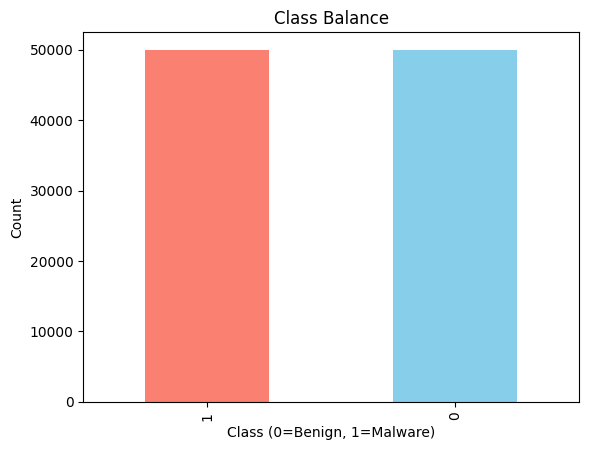

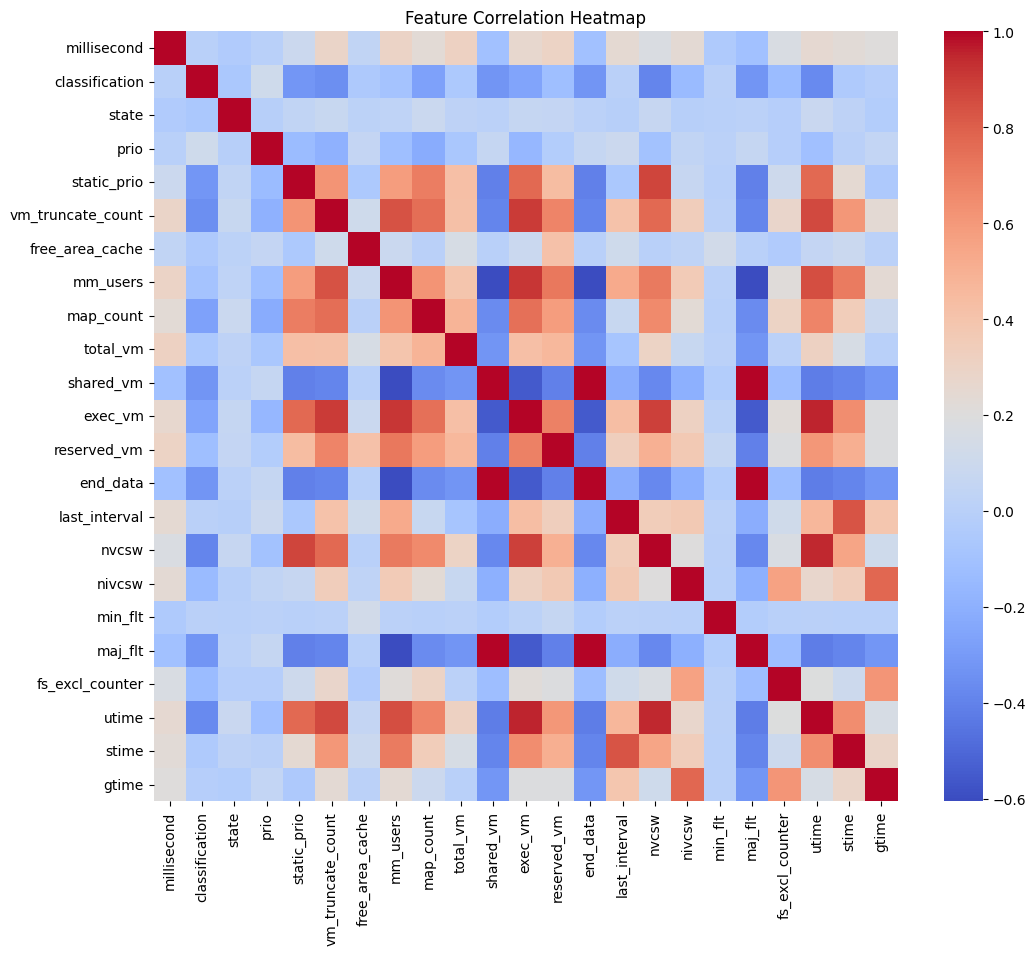

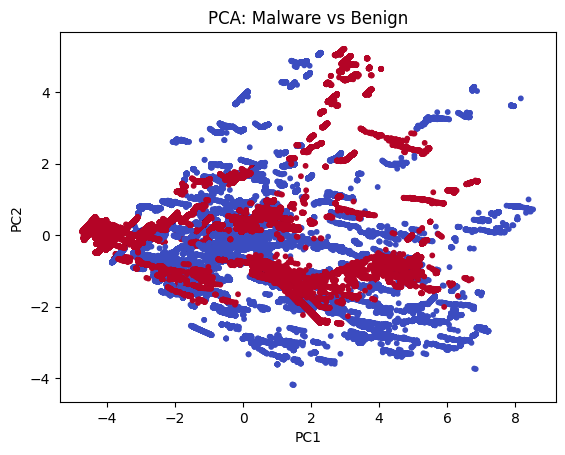

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1️⃣ Class Balance
df['classification'].value_counts().plot(kind='bar', color=['salmon','skyblue'])
plt.title('Class Balance')
plt.xlabel('Class (0=Benign, 1=Malware)')
plt.ylabel('Count')
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 3️⃣ PCA Visualization
X = df.drop(columns=['classification'])
y = df['classification']
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', s=10)
plt.title('PCA: Malware vs Benign')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12493
           1       0.93      0.95      0.94     12507

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

